In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
df = pd.read_csv('../input/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')
df.shape

(35887, 3)

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
print(df['Usage'].value_counts())

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [6]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

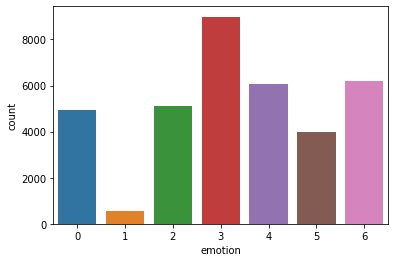

In [7]:
sns.countplot(df.emotion)
plt.show()

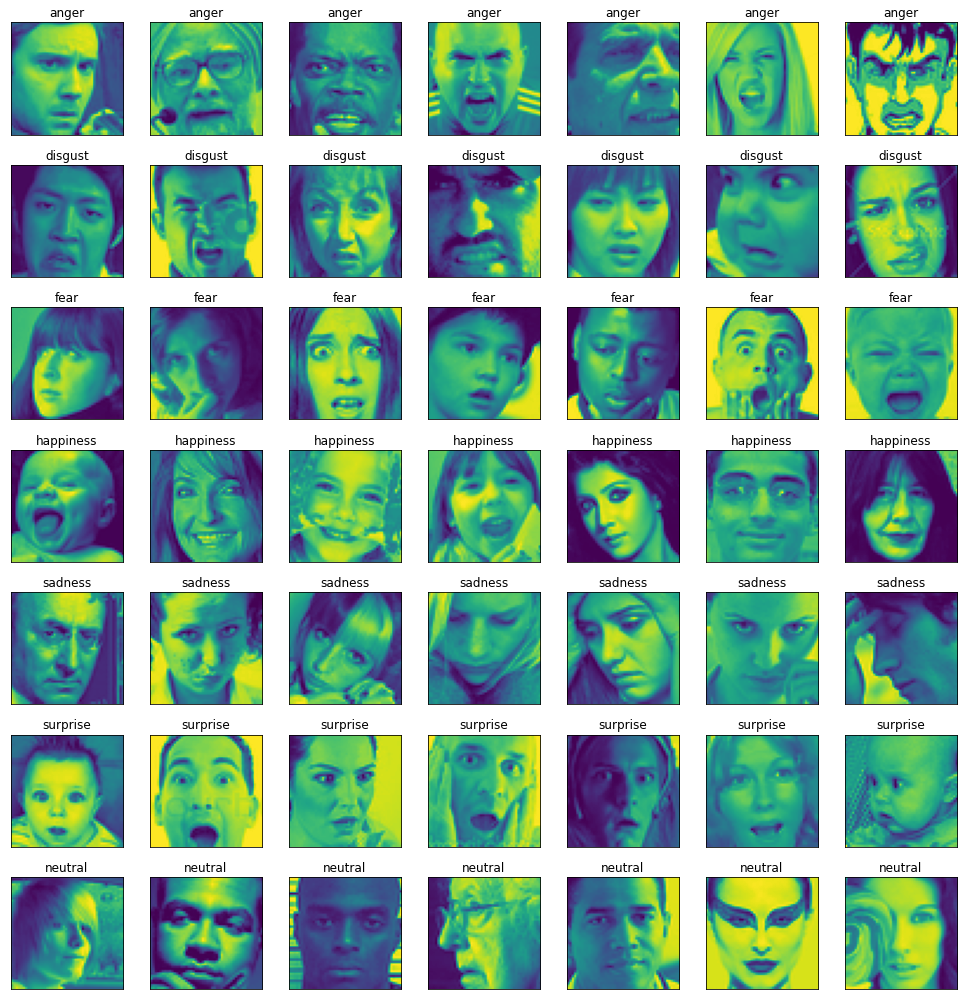

In [8]:
# Visualize some examples from the dataset.
fig = plt.figure(1, (14, 14))
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
classes = sorted(df.emotion.unique())

k = 0
for label in classes:
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [9]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

In [10]:
X_train = df[df.Usage=='Training'].pixels
y_train = df[df.Usage=='Training'].emotion
X_val = df[df.Usage=='PrivateTest'].pixels
y_val = df[df.Usage=='PrivateTest'].emotion
X_test = df[df.Usage=='PublicTest'].pixels
y_test = df[df.Usage=='PublicTest'].emotion


In [11]:
X_train.head()

0    70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1    151 150 147 155 148 133 111 140 170 174 182 15...
2    231 212 156 164 174 138 161 173 182 200 106 38...
3    24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4    4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
Name: pixels, dtype: object

In [12]:
y_train.head()

0    0
1    0
2    2
3    4
4    6
Name: emotion, dtype: int64

In [13]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((28709,), (28709,), (3589,), (3589,), (3589,), (3589,))

In [14]:
# string pixels to array
def str_array(data):
    img_array = data.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
    img_array = np.stack(img_array, axis=0)
    return img_array

In [15]:
X_train = str_array(X_train)
X_val = str_array(X_val)
X_test = str_array(X_test)

In [16]:
# Pixels normalization
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255
print(X_train)

[[[[0.27450982]
   [0.3137255 ]
   [0.32156864]
   ...
   [0.20392157]
   [0.16862746]
   [0.16078432]]

  [[0.25490198]
   [0.23921569]
   [0.22745098]
   ...
   [0.21960784]
   [0.20392157]
   [0.17254902]]

  [[0.19607843]
   [0.16862746]
   [0.21176471]
   ...
   [0.19215687]
   [0.21960784]
   [0.18431373]]

  ...

  [[0.35686275]
   [0.25490198]
   [0.16470589]
   ...
   [0.28235295]
   [0.21960784]
   [0.16862746]]

  [[0.3019608 ]
   [0.32156864]
   [0.30980393]
   ...
   [0.4117647 ]
   [0.27450982]
   [0.18039216]]

  [[0.3019608 ]
   [0.28235295]
   [0.32941177]
   ...
   [0.41568628]
   [0.42745098]
   [0.32156864]]]


 [[[0.5921569 ]
   [0.5882353 ]
   [0.5764706 ]
   ...
   [0.5058824 ]
   [0.54901963]
   [0.47058824]]

  [[0.5921569 ]
   [0.58431375]
   [0.58431375]
   ...
   [0.47843137]
   [0.5529412 ]
   [0.5372549 ]]

  [[0.5921569 ]
   [0.5921569 ]
   [0.6117647 ]
   ...
   [0.42745098]
   [0.48235294]
   [0.57254905]]

  ...

  [[0.7372549 ]
   [0.7372549 ]
   [0.4

In [17]:
# Turn emotions to one-hot labels
from keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=7)
y_val = to_categorical(y_val,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

Using TensorFlow backend.


In [18]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [19]:
# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)

# Build CNN model

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

batch_size = 512
epochs = 20

model = Sequential()

# 第一层
model.add(Conv2D(input_shape=(48, 48, 1), filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# 第二层
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# 第三层
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

# 全连接层
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Train start

In [28]:
# 进行训练
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,y_val))
 
test_score = model.evaluate(X_test, y_test)

Train on 28709 samples, validate on 3589 samples
Epoch 1/60
28709/28709 [==============================] - 4s 148us/step - loss: 1.8576 - accuracy: 0.2250 - val_loss: 1.8205 - val_accuracy: 0.2449
Epoch 2/60
28709/28709 [==============================] - 3s 100us/step - loss: 1.8227 - accuracy: 0.2383 - val_loss: 1.7888 - val_accuracy: 0.2527
Epoch 3/60
28709/28709 [==============================] - 3s 101us/step - loss: 1.7972 - accuracy: 0.2481 - val_loss: 1.7559 - val_accuracy: 0.2683
Epoch 4/60
28709/28709 [==============================] - 3s 99us/step - loss: 1.7564 - accuracy: 0.2819 - val_loss: 1.6649 - val_accuracy: 0.3672
Epoch 5/60
28709/28709 [==============================] - 3s 101us/step - loss: 1.6760 - accuracy: 0.3357 - val_loss: 1.5796 - val_accuracy: 0.3968
Epoch 6/60
28709/28709 [==============================] - 3s 100us/step - loss: 1.6118 - accuracy: 0.3699 - val_loss: 1.5167 - val_accuracy: 0.4269
Epoch 7/60
28709/28709 [==============================] - 3s 100

Epoch 56/60
28709/28709 [==============================] - 3s 99us/step - loss: 0.4940 - accuracy: 0.7952 - val_loss: 1.7680 - val_accuracy: 0.5938
Epoch 57/60
28709/28709 [==============================] - 3s 100us/step - loss: 0.4613 - accuracy: 0.8101 - val_loss: 1.9248 - val_accuracy: 0.5899
Epoch 58/60
28709/28709 [==============================] - 3s 101us/step - loss: 0.4727 - accuracy: 0.8045 - val_loss: 1.8999 - val_accuracy: 0.5885
Epoch 59/60
28709/28709 [==============================] - 3s 100us/step - loss: 0.4508 - accuracy: 0.8124 - val_loss: 2.0365 - val_accuracy: 0.5818
Epoch 60/60
3589/3589 [==============================] - 0s 103us/step


# Using matplotlib to check the result

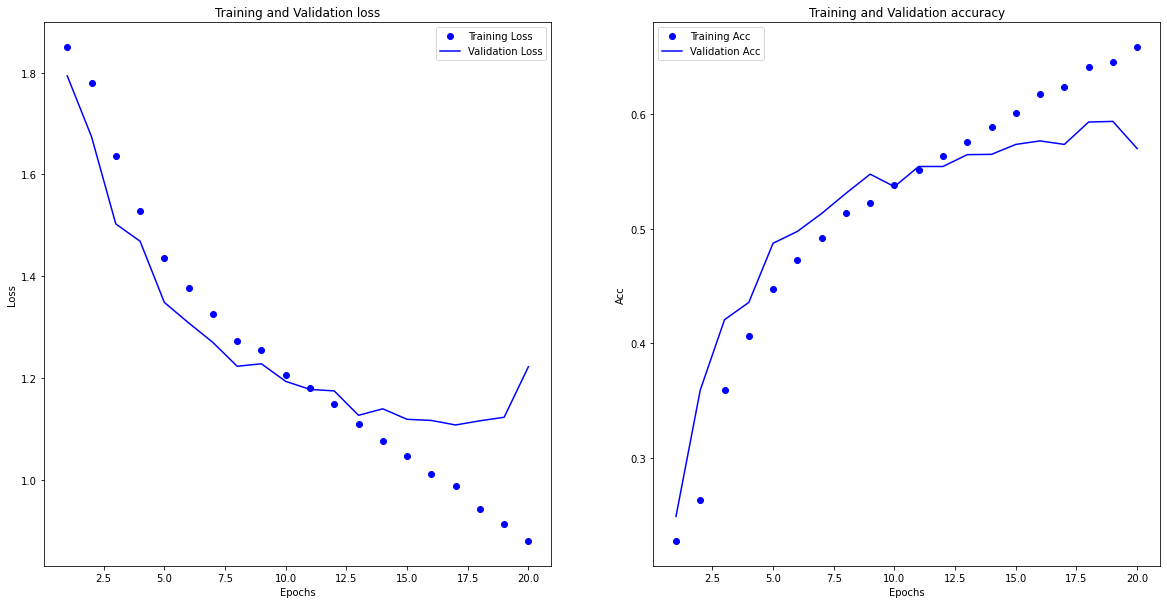

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs2 = range(1,epochs+1)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.plot(epochs2,loss,'bo',label = 'Training Loss')
ax.plot(epochs2,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
ax2 = fig.add_subplot(122)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
ax2.plot(epochs2,acc,'bo',label = 'Training Acc')
ax2.plot(epochs2,val_acc,'b',label='Validation Acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.savefig('result.png')
plt.show()

# Evaluation result

In [23]:
test_score

[1.227501852228702, 0.5672889351844788]